In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import re

In [17]:
%run rules.ipynb

In [21]:
rules = getRules().splitlines()
rule = rules[22]

resNode = re.search('(\w+)\*', rule).group(1)

set(re.findall('(not )?(\w+)', re.sub('^1:.+=|\sand\s|\sor\s|\(|\)', ' ', rule)))

{('', 'Arp2_3'),
 ('', 'Cortactin'),
 ('', 'LIMK'),
 ('', 'PIP2'),
 ('', 'SSH'),
 ('', 'Thymosin'),
 ('not ', 'Arp2_3'),
 ('not ', 'Cortactin'),
 ('not ', 'LIMK'),
 ('not ', 'PIP2'),
 ('not ', 'SSH'),
 ('not ', 'Thymosin')}

In [25]:
rule = rules[25]
rule

re.findall('^#.+votingRule\(\[(.+)\], \[(.+)\]\)', rule)


[('Dia1, Dia2, Ena_Vasp', 'CP, Cofilin')]

In [52]:
G=nx.DiGraph()
skipNext = False
for rule in getRules().splitlines():
    if skipNext:
        skipNext = False
        continue
        
    resNode = re.search('(\w+)\*', rule).group(1)        
    G.add_node(resNode)
    inputs = re.findall('^#.+votingRule\(\[(.+)\], \[(.+)\]\)', rule)
    if len(inputs) > 0:
        for node in inputs[0][0].split(', '):
            G.add_node(node)
            G.add_edge(node, resNode, inh=False)
        for node in inputs[0][1].split(', '):
            G.add_node(node)
            G.add_edge(node, resNode, inh=True)        
        skipNext = True
    else:        
        for part in re.findall('(not )?(\w+)', re.sub('^1:.+=|\sand\s|\sor\s|\(|\)', ' ', rule)):
            node = part[1]
            inh = part[0] != ''
            G.add_node(node)
            G.add_edge(node, resNode, inh=inh)


In [82]:
cycles = {'neg': [], 'pos': []}
for cycle in nx.cycles.simple_cycles(G):
    inhNum = 0
    for i in range(1, len(cycle)):
        if G[cycle[i-1]][cycle[i]]['inh'] == False:
            inhNum = inhNum + 1
    
    if inhNum % 2 == 0:
        cycles['pos'].append(cycle)
    else:
        cycles['neg'].append(cycle)
    
len(cycles['neg'])

240

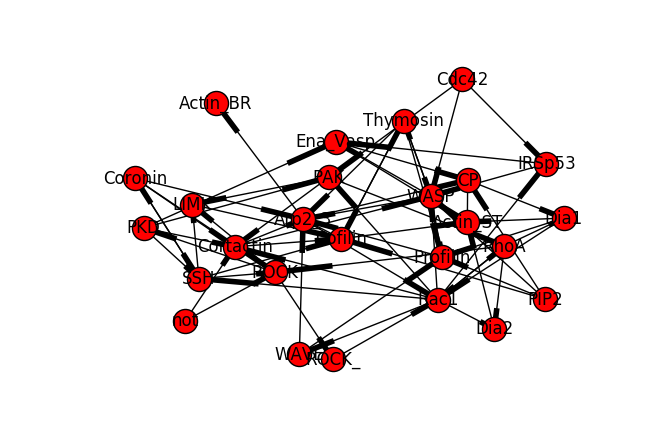

In [56]:
nx.draw(G, with_labels=True)